## Análise de Dados dos Crimes Contra a Mulher em Belém

#### 1. Seleção e tratamento de dados

In [3]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\\Users\\manut\\Downloads\\crimes_2019_a_2022.csv", low_memory=False)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,nro_bop,nro_bop_aditado,nro_tombo,tipo_tombo,unidade_origem,unidade_responsavel,data_registro,hora_registro,data_fato,dia_semana,hora_fato,fx_4_hor,fx_12_hr,data_inst_proc,data_concl_proc,sit_proc,classe_motivo,mes_registro,mes_fato,ano_registro,ano_fato,registros,consolidado,fato_real,especificacao_crime,meio_emp_deac,latitude,longitude,causa_presumivel,especializacao_fato,grupo_ocorrencia,sub_grupo,meio_empregado_sisp,distrito,municipios,regionais,bairros,reg_integracao,risp,aisp,rua_fato,empresa,linha,tipo_transporte,complemento,local_ocorrencia,identificacao_fato,relato,vit_dt_nasc,vit_idade,vit_fx_etaria,vit_nro_doc,vit_tipo_doc,vit_pai,vit_mae,vit_tipo,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_data_nasc,aut_idade,aut_fx_etaria,aut_tipo,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil,meio_locomocao,cor_veiculo,marca_veic_fuga,modelo_do_veic_fuga,qtd_autor,relatorio,ident_autoria,atuacao
0,277/2019.255548-2,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,SAO FELIX DO XINGU - UNIDADE POLICIAL 212,2019-12-12,1970-01-01 14:43:00,2019-12-11,QUA,1970-01-01 15:30:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,SAO FELIX DO XINGU,SAO FELIX DO XINGU,ALTO XINGU,ZONA RURAL,REGIAO ARAGUAIA,14ª RISP,NaN,RUA PRINCIPAL,NaN,NaN,NaN,NaN,ESTABELECIMENTO BANCARIO,FURTO IP: 177.23.224.122,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1943-06-24 00:00:00,76.0,IDOSO (65 ANOS OU MAIS),18637744834,CPF,ANTONIO ALVES DA SILVA,MARIA MARTINS DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,277/2019.257206-7,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,2019-12-16,1970-01-01 10:38:00,2019-12-10,TER,1970-01-01 15:00:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,BELEM,BELEM,CAPITAL,MANGUEIRAO,REGIAO GUAJARA,01ª RISP,10ª AISP,CONJ. CATALINA,NaN,NaN,NaN,NaN,VIA PUBLICA,FURTO IP: 189.40.106.250,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1969-11-14 00:00:00,50.0,ADULTO IV (35 A 64 ANOS),NaN,NaN,NaN,MARIA DAS GRA?AS ARAUJO SANTOS,NaN,F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,277/2019.161968-6,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,TUCURUI - PESSOA 454,2019-08-10,1970-01-01 10:55:00,2019-08-06,TER,1970-01-01 13:30:00,12 |-- 18,12 |-- 14,1900-09-09,1900-09-09,NAO INSTAURADO,REGISTROS QUE NAO GERAM PROCEDIMENTO,AGOSTO,AGOSTO,2019,2019,DANO CULPOSO (CIVIL),DANO NO TRANSITO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,DELITO DE TRANSITO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,TUCURUI,TUCURUI,LAGO DE TUCURUI,CENTRO,REGIAO LAGO TUCURUI,09ª RISP,NaN,"PRINCIPAL, RUA",NaN,NaN,NaN,NaN,OUTROS,ACIDENTE DE TRANSITO IP: 131.255.227.254,"EXCLUSIVAMENTE PARA FINS DE DIREITO, O RELATOR...",1986-04-17 00:00:00,33.0,ADULTO III (30 A 34 ANOS),03981094984,CNH,NaN,RAIMUNDA OLIVEIRA DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,277/2019.162974-0,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,2019-08-12,1970-01-01 13:00:00,2019-08-10,SAB,1970-01-01 19:30:00,18 |-- 24,18 |-- 20,1900-09-09,1900-09-09,NAO IN

### Filtrar apenas as colunas que interessam para a análise:
- Informações gerais:                  
    - 'unidade_origem'
    - 'unidade_responsavel'
    - 'dia_semana'
    - 'fx_4_hor'
    - 'fx_12_hr'
    - 'classe_motivo'
    - 'mes_fato'
    - 'ano_fato'
    - 'registros'
    - 'consolidado'
    - 'especificacao_crime'
    - 'causa_presumivel'
    - 'meio_empregado_sisp'
    - 'municipios'
    - 'bairros' 
    - 'local_ocorrencia'
    - 'identificacao_fato'
    - 'grau_de_relacionamento'
- Dados das vitimas:
   - 'vit_idade'
   - 'vit_fx_etaria'
   - 'vit_sexo'
   - 'vit_cor_pele'
   - 'vit_grau_inst'
   - 'vit_profissao'
   - 'vit_situacao_emprego'
   - 'vit_estado_civil'
- Dados dos autores: 
   - 'aut_idade'
   - 'aut_fx_etaria'
   - 'aut_sexo'
   - 'aut_cor_pele'
   - 'aut_grau_inst'
   - 'aut_profissao'
   - 'aut_sit_emprego'
   - 'aut_est_civil'


In [6]:
crimes_df=df[['unidade_origem','unidade_responsavel','dia_semana','fx_4_hor','fx_12_hr','classe_motivo','mes_fato',
                    'ano_fato','registros','consolidado','especificacao_crime','causa_presumivel',
                    'meio_empregado_sisp','municipios','bairros','local_ocorrencia','identificacao_fato','vit_idade',
                    'vit_fx_etaria','vit_sexo','vit_cor_pele','vit_grau_inst','vit_profissao','vit_situacao_emprego',
                    'vit_estado_civil','aut_idade','aut_fx_etaria','aut_sexo','grau_de_relacionamento','aut_cor_pele',
                    'aut_grau_inst','aut_profissao','aut_sit_emprego','aut_est_civil']]

In [ ]:
#infos_df.head()

### Filtros para a capital Belém e vitimas apenas do sexo feminino

In [7]:
crimes_df = crimes_df[crimes_df['municipios'] == 'BELEM']
crimes_df.reset_index(drop=True, inplace=True)
crimes_df.drop(columns=['municipios'], inplace=True)

In [8]:
crimes_df

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
0,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,TER,12 |-- 18,14 |-- 16,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MANGUEIRAO,VIA PUBLICA,FURTO IP: 189.40.106.250,50.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
1,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,SAB,18 |-- 24,18 |-- 20,CRIMES CONTRA O PATRIMONIO,AGOSTO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,GUAMA,VIA PUBLICA,FURTO IP: 177.194.148.73,40.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
2,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,SAB,12 |-- 18,12 |-- 14,CRIMES CONTRA O PATRIMONIO,AGOSTO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,TRANSPORTE,FURTO IP: 179.211.211.100,49.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
3,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,SEX,00 |-- 06,02 |-- 04,TITULO IV DA REPRESSAO A PRODUCAO NAO AUTORIZA...,NOVEMBRO,2019,TRAFICO DE DROGAS,TRAFICO DE DROGAS,NaN,ENTORPECENTES,OUTROS MEIOS,MARAMBAIA,VIA PUBLICA,TIPICA > LEI 11.343/2006: LEI DE DROGAS > TITU...,69.0,IDOSO (65 ANOS OU MAIS),PJ,NaN,ENSINO SUPERIOR COMPLETO,OUTRAS PROFISSOES,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
4,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,18 |-- 24,20 |-- 22,TITULO XI DOS CRIMES CONTRA A ADMINISTRACAO PU...,NOVEMBRO,2019,DESACATO,DESACATO,NaN,DEVASSIDAO,OUTROS MEIOS,SOUZA,VIA PUBLICA,TIPICA > DECRETO LEI 2848/1940 - CPB - CODIGO ...,69.0,IDOSO (65 ANOS OU MAIS),PJ,NaN,ENSINO SUPERIOR COMPLETO,OUTRAS PROFISSOES,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564456,NaN,NaN,DOM,06 |-- 12,06 |-- 08,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,AMEACA,AMEACA,NaN,OUTRAS,SEM INSTRUMENTO,COQUEIRO BELEM,RESIDENCIA,TIPICA > AMEACA > AMEACA,53.0,ADULTO IV (35 A 64 ANOS),M,PREJUDICADO,ENSINO MEDIO INCOMPLETO,COMERCIANTE,NaN,SOLTEIRO(A),66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN,NaN,NaN,NaN
564457,NaN,NaN,DOM,00 |-- 06,00 |-- 02,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,INVASAO DE DISPOSITIVO INFORMATICO CAPUT,INVASAO DE DISPOSITIVO INFORMATICO,NaN,OUTRAS,OUTROS MEIOS,MARAMBAIA,"CAFE, BAR, RESTAURANTE",TIPICA > DECRETO LEI 2848/1940 - CPB - CODIGO ...,35.0,ADULTO IV (35 A 64 ANOS),M,PREJUDICADO,ENSINO SUPERIOR COMPLETO,SERVIDOR PUBLICO,NaN,SOLTEIRO(A),NaN,PREJUDICADO,P,NaN,NaN,NaN,NaN,NaN,NaN
564458,NaN,NaN,SEX,00 |-- 06,00 |-- 02,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,INVASAO DE DISPOSITIVO INFORMATICO CAPUT,INVASAO DE DISPOSITIVO INFORMATICO,NaN,OUTRAS,OUTROS MEIOS,PEDREIRA,CARRO DE TRANSPORTE DE VALORES,TIPICA > DECRETO LEI 2848/1940 - CPB - CODIGO ...,74.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,APOSENTADO,NaN,SOLTEIRO(A),NaN,PREJUDICADO,P,NaN,NaN,NaN,NaN,NaN,NaN
564459,NaN,NaN,SEX,00 |-- 06,04 |-- 06,FATOS ATIPICOS,FEVEREIRO,2022,ACIDENTE DE TRANSITO SEM VITIMA,ACIDENTE DE TRANSITO SEM VITIMA,NaN,OUTRAS,OUTROS MEIOS,BARREIRO,VIA PUBLICA,ATIPICA > OCORRENCIAS EXTRA - POLICIAIS > FATO...,2

In [9]:
crimes_df = crimes_df[crimes_df['vit_sexo'] == 'F']
crimes_df.reset_index(drop=True, inplace=True)

In [10]:
crimes_df

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
0,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,TER,12 |-- 18,14 |-- 16,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MANGUEIRAO,VIA PUBLICA,FURTO IP: 189.40.106.250,50.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
1,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,SAB,18 |-- 24,18 |-- 20,CRIMES CONTRA O PATRIMONIO,AGOSTO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,GUAMA,VIA PUBLICA,FURTO IP: 177.194.148.73,40.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
2,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,SAB,12 |-- 18,12 |-- 14,CRIMES CONTRA O PATRIMONIO,AGOSTO,2019,ART.155 - FURTO,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,TRANSPORTE,FURTO IP: 179.211.211.100,49.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,NaN,NaN,SOLTEIRO(A),99999.0,NAO INFORMADO,NI,NaN,NaN,NaN,NaN,NaN,NaN
3,DEL.VIRTUAL - 277,MARCO - UNID.POL. 14 - 1º RISP,DOM,18 |-- 24,18 |-- 20,CRIMES CONTRA O PATRIMONIO,ABRIL,2019,ART.157 - ROUBO,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,ARMA DE FOGO,MARCO,VIA PUBLICA,ROUBO IP: 189.42.171.20,66666.0,PREJUDICADO,F,NaN,NaN,NaN,NaN,NaN,99999.0,NAO INFORMADO,M,NaN,NaN,NaN,NaN,NaN,NaN
4,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,QUA,06 |-- 12,10 |-- 12,CRIMES CONTRA O PATRIMONIO,ABRIL,2019,ART.157 - ROUBO,ROUBO,TRANSEUNTE/CELULAR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,ROUBO IP: 187.122.245.63,66666.0,PREJUDICADO,F,NaN,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,99999.0,NAO INFORMADO,M,NAO INFORMADO,NaN,NaN,NaN,NAO INFORMADO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239343,NaN,NaN,QUI,06 |-- 12,10 |-- 12,CRIMES CONTRA O PATRIMONIO,FEVEREIRO,2022,ART.171 - ESTELIONATO,ESTELIONATO,NaN,OUTRAS,SEM INSTRUMENTO,CAMPINA,ESTABELECIMENTO COMERCIAL,ESTELIONATO IP: 187.40.81.40,88.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,NaN,NaN,NaN,VIUVO(A),66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN,NaN,NaN,NaN
239344,NaN,NaN,QUA,00 |-- 06,04 |-- 06,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,AMEACA,AMEACA,NaN,AMBICAO,OUTROS MEIOS,VAL-DE-CANS,VIA PUBLICA,TIPICA > AMEACA > AMEACA,38.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,AGENTE,NaN,SOLTEIRO(A),66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN,NaN,NaN,NaN
239345,NaN,NaN,QUI,06 |-- 12,08 |-- 10,CRIMES CONTRA A FE PUBLICA,FEVEREIRO,2022,FALSA IDENTIDADE,FALSA IDENTIDADE,NaN,OUTRAS,SEM INSTRUMENTO,UMARIZAL,SEM INFORMACAO,FALSA IDENTIDADE IP: 177.194.140.23,68.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,NaN,NaN,NaN,CASADO(A),NaN,PREJUDICADO,P,NaN,NaN,NaN,NaN,NaN,NaN
239346,NaN,NaN,SEG,18 |-- 24,18 |-- 20,TITULO I - DOS CRIMES CONTRA A PESSOA,FEVEREIRO,2022,DIFAMACAO,DIFAMACAO,NaN,OUTRAS,OUTROS MEIOS,NAZARE,"INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAG...",TIPICA > DIFAMACAO > DIFAMACAO,41.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,EMPRESARIO,NaN,CASADO(A),NaN,PREJUDICADO,P,NaN,NaN,NaN,NaN,NaN,NaN


### Verificar tipos de dados em cada coluna, a quantidade de valores não nulos (não missing), e a quantidade total de memória utilizada pelo DataFrame.

In [11]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239348 entries, 0 to 239347
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unidade_origem          121396 non-null  object 
 1   unidade_responsavel     121396 non-null  object 
 2   dia_semana              239348 non-null  object 
 3   fx_4_hor                239348 non-null  object 
 4   fx_12_hr                239348 non-null  object 
 5   classe_motivo           239254 non-null  object 
 6   mes_fato                239348 non-null  object 
 7   ano_fato                239348 non-null  int64  
 8   registros               239348 non-null  object 
 9   consolidado             239348 non-null  object 
 10  especificacao_crime     106224 non-null  object 
 11  causa_presumivel        239348 non-null  object 
 12  meio_empregado_sisp     239341 non-null  object 
 13  bairros                 239348 non-null  object 
 14  local_ocorrencia    

In [12]:
crimes_df.isnull().sum()

unidade_origem            117952
unidade_responsavel       117952
dia_semana                     0
fx_4_hor                       0
fx_12_hr                       0
classe_motivo                 94
mes_fato                       0
ano_fato                       0
registros                      0
consolidado                    0
especificacao_crime       133124
causa_presumivel               0
meio_empregado_sisp            7
bairros                        0
local_ocorrencia               3
identificacao_fato            17
vit_idade                     73
vit_fx_etaria                 37
vit_sexo                       0
vit_cor_pele               81236
vit_grau_inst              57388
vit_profissao              56039
vit_situacao_emprego      152663
vit_estado_civil            7640
aut_idade                  63777
aut_fx_etaria              17488
aut_sexo                   31514
grau_de_relacionamento    202639
aut_cor_pele              167396
aut_grau_inst             171293
aut_profis

In [13]:
missing_by_column = crimes_df.isnull().sum()
absol_miss = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
perce_miss = absol_miss / crimes_df.shape[0] * 100
dtype_miss = pd.Series({x: crimes_df[x].dtype for x in absol_miss.index})

missing = pd.concat([dtype_miss, absol_miss, perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,202639,84.662918
aut_sit_emprego,object,175793,73.446613
aut_profissao,object,172044,71.880275
aut_grau_inst,object,171293,71.566506
aut_est_civil,object,171187,71.522219
aut_cor_pele,object,167396,69.938332
vit_situacao_emprego,object,152663,63.782860
especificacao_crime,object,133124,55.619433
unidade_responsavel,object,117952,49.280545
unidade_origem,object,117952,49.280545


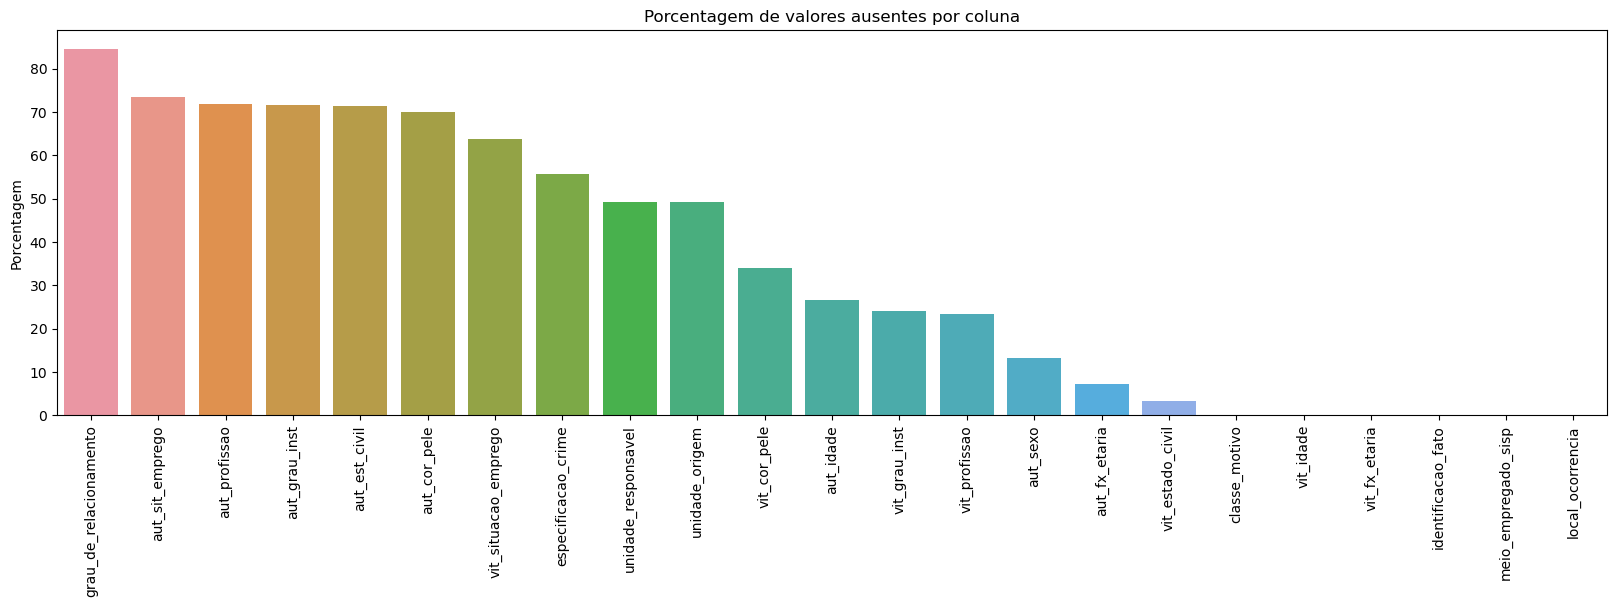

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna")
plt.show()

- Como as colunas "local_ocorrencia","meio_empregado_sisp" e "identificacao_fato" tem poucos valores missing, serao removidas apenas as linhas com valores faltantes

In [15]:
crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp", "identificacao_fato"], inplace=True)

C:\Users\manut\AppData\Local\Temp\ipykernel_940\1058442909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp", "identificacao_fato"], inplace=True)


In [16]:
crimes_df.reset_index(drop=True, inplace=True)


In [17]:
missing_by_column_after = crimes_df.isnull().sum()
absol_miss_after = missing_by_column_after[missing_by_column_after > 0].sort_values(ascending=False)
perce_miss_after = absol_miss_after / crimes_df.shape[0] * 100
dtype_miss_after = pd.Series({x: crimes_df[x].dtype for x in absol_miss_after.index})

missing_after = pd.concat([dtype_miss_after, absol_miss_after, perce_miss_after], axis=1)
missing_after.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing_after

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,202622,84.664658
aut_sit_emprego,object,175776,73.447182
aut_profissao,object,172026,71.880262
aut_grau_inst,object,171276,71.566878
aut_est_civil,object,171170,71.522587
aut_cor_pele,object,167379,69.938535
vit_situacao_emprego,object,152645,63.782002
especificacao_crime,object,133109,55.618975
unidade_responsavel,object,117951,49.285276
unidade_origem,object,117951,49.285276


### Tratamento de valores NaN

Dada a considerável presença de dados nulos, excedendo 50% em várias colunas, a abordagem adotada para mitigar essa lacuna consistirá na substituição dos valores NaN por meio do rótulo "Não informado", visando evitar a perda significativa de dados.

In [18]:
#crimes_df.fillna(value={'grau_de_relacionamento': 'NAO INFORMADO','aut_sit_emprego':'NAO INFORMADO'})

colunas_com_NaN = ["grau_de_relacionamento", "aut_sit_emprego","aut_profissao","aut_grau_inst",
                  "aut_est_civil","aut_cor_pele","vit_situacao_emprego","especificacao_crime",
                   "unidade_responsavel","unidade_origem","vit_cor_pele","aut_idade","vit_grau_inst",
                   "vit_profissao","aut_sexo","aut_fx_etaria","vit_estado_civil","classe_motivo",
                  "vit_idade","vit_fx_etaria"]
crimes_df.loc[:, colunas_com_NaN] = crimes_df.loc[:, colunas_com_NaN].fillna("Nao informado")

In [19]:
crimes_df.isnull().sum()

unidade_origem            0
unidade_responsavel       0
dia_semana                0
fx_4_hor                  0
fx_12_hr                  0
classe_motivo             0
mes_fato                  0
ano_fato                  0
registros                 0
consolidado               0
especificacao_crime       0
causa_presumivel          0
meio_empregado_sisp       0
bairros                   0
local_ocorrencia          0
identificacao_fato        0
vit_idade                 0
vit_fx_etaria             0
vit_sexo                  0
vit_cor_pele              0
vit_grau_inst             0
vit_profissao             0
vit_situacao_emprego      0
vit_estado_civil          0
aut_idade                 0
aut_fx_etaria             0
aut_sexo                  0
grau_de_relacionamento    0
aut_cor_pele              0
aut_grau_inst             0
aut_profissao             0
aut_sit_emprego           0
aut_est_civil             0
dtype: int64

### Abordando inconsistências

Durante esta fase, procederemos com a normalização de valores que foram registrados de maneiras diversas, mas que representam o mesmo conceito e tratamento de informacoes nao pertinentes.

1. Verificar os objetos diferentes que compoem cada coluna e quantos se repetem

- local_ocorrencia

In [20]:
local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique().tolist()
print("Numero unico de local_ocorrencia: ", len(local_ocorrencia_unico))
local_ocorrencia_unico

Numero unico de local_ocorrencia:  194


['VIA PUBLICA',
 'TRANSPORTE',
 'OUTROS',
 'RESIDENCIA PARTICULAR',
 'MAR, RIO, LAGOA',
 'CAFE,BAR,ETC',
 'HOSPITAL',
 'OUTROS ESTADOS',
 'ESTABELECIMENTO BANCARIO',
 'CONDOMINIO COMERCIAL',
 'ESTABELECIMENTO DE ENSINO',
 'LOGRADORO PUBLICO',
 'INTERNET',
 'CASA COMERCIAL',
 'CAFE, BAR, RESTAURANTE',
 'PREDIO',
 'CONDOMINIO RESIDENCIAL',
 'EDIFICIO PUBLICO',
 'VIA PUBLICA ',
 'CASA DE TOLERANCIA',
 'CRECHE',
 'LOJAS DE CONVENIENCIA',
 'TRANSPORTE ',
 'CASA COMERCIAL ',
 'CAIXA ELETRONICO',
 'LOJA ',
 'LOJA',
 'VIA FERREA',
 'FARMACIA',
 'REDIDENCIA PARTICULAR ',
 'HOTEL, PENSAO, ETC',
 'HABITACAO COLETIVA',
 'SUPERMERCADO',
 'OUTROS PAISES',
 'PENITENCIARIA, REFORMATORIO',
 'PREDIO EM OBRAS',
 'MERCADINHO',
 'LOJA DE CONVENIENCIA ',
 'IGREJA',
 'SALAO DE BELEZA',
 'POSTO DE GASOLINA',
 'CLINICA ',
 'TERRENO BALDIO',
 'COOPERATIVA',
 'CAMPUS UNIVERSITARIO',
 'CRAS',
 'ORGAO PUBLICO',
 'PANIFICADORA',
 'BAR',
 'FARMACIA ',
 'CLUBE',
 'SALAO DE BELEZA ',
 'EMPRESA',
 'CONSULTORIO',
 'TRAN

In [21]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA PUBLICA ",'local_ocorrencia'] = 'VIA PUBLICA'

In [22]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE ",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [23]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE URBANO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [24]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [25]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE POR APLICATIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [26]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [27]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPOSTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [28]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [29]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE (COLETIVO, PRIVADO OU ESCOLAR)",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [30]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETVIO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [31]:
crimes_df.loc[crimes_df.local_ocorrencia == "COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [32]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [33]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO, LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'


In [34]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR,RIO,LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'

In [35]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO E LAGOA",'local_ocorrencia']= 'MAR, RIO, LAGOA'


In [36]:
crimes_df.loc[crimes_df.local_ocorrencia == "PORTO",'local_ocorrencia']=  'PORTOS / MARINAS / ATRACADOUROS',

In [37]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR / OCEANO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [38]:
crimes_df.loc[crimes_df.local_ocorrencia == "REPRESAS",'local_ocorrencia']='MAR, RIO, LAGOA'

In [39]:
crimes_df.loc[crimes_df.local_ocorrencia == "RIO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [40]:
crimes_df.loc[crimes_df.local_ocorrencia == "IGARAPE",'local_ocorrencia']='MAR, RIO, LAGOA'

In [41]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESTAURANTE ",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [42]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOSPITAL ",'local_ocorrencia'] = 'HOSPITAL'

In [43]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO DE COMERCIAL",'local_ocorrencia'] = 'ESTABELECIMENTO COMERCIAL'

In [44]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO PRISIONAL",'local_ocorrencia'] = 'PENITENCIARIA, REFORMATORIO'

In [45]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (INTERNET)",'local_ocorrencia'] = 'INTERNET'

In [46]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (NTERNET)",'local_ocorrencia'] = 'INTERNET'

In [47]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (PIX)",'local_ocorrencia'] = 'INTERNET'

In [48]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL",'local_ocorrencia'] = 'INTERNET'

In [49]:
crimes_df.loc[crimes_df.local_ocorrencia == "INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAGENS, E-MAIL, SITES, BLOGS, PORTAIS E OUTROS)",'local_ocorrencia'] = 'INTERNET'

In [50]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA COMERCIAL ",'local_ocorrencia'] = 'CASA COMERCIAL'

In [51]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO EM OBRAS",'local_ocorrencia'] = 'PREDIO'


In [52]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO DO JORNAL",'local_ocorrencia'] = 'PREDIO'

In [53]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO/PALACIO DO RADIO",'local_ocorrencia'] = 'PREDIO'

In [54]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA ",'local_ocorrencia'] = 'LOJA'

In [55]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMERICANAS",'local_ocorrencia'] = 'LOJA'

In [56]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA DE CONVENIENCIA ",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [57]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJAS DE CONVENIENCIA",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [58]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA FERREA",'local_ocorrencia'] =   'ESTACAO FERROVIARIA'

In [59]:
crimes_df.loc[crimes_df.local_ocorrencia == "FARMACIA ",'local_ocorrencia'] =   'FARMACIA'

In [60]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [61]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [62]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROPRIEDADE RESIDENCIAL URBANA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [63]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO ",'local_ocorrencia'] = 'SUPERMERCADO'

In [64]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO LIDER",'local_ocorrencia'] = 'SUPERMERCADO'

In [65]:
crimes_df.loc[crimes_df.local_ocorrencia == "SALAO DE BELEZA ",'local_ocorrencia'] = 'SALAO DE BELEZA'

In [66]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE GASOLINA ",'local_ocorrencia'] = 'POSTO DE GASOLINA'

In [67]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE SAUDE ",'local_ocorrencia'] = 'POSTO DE SAUDE'

In [68]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLINICA ",'local_ocorrencia'] = 'CLINICA'

In [69]:
crimes_df.loc[crimes_df.local_ocorrencia == "PANIFICADORA ",'local_ocorrencia'] = 'PANIFICADORA'

In [70]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBE\\r\\n",'local_ocorrencia'] = 'CLUBE'

In [71]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBES E AGREMIACOES",'local_ocorrencia'] = 'CLUBE'

In [72]:
crimes_df.loc[crimes_df.local_ocorrencia == "INDUSTRIA",'local_ocorrencia'] = 'ESTABELECIMENTO INDUSTRIAL'

In [73]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO ",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [74]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO BANCARIO",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [75]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROSTIBULO",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [76]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA DE TOLERANCIA",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [77]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTADIO DE FUTEBOL",'local_ocorrencia'] = 'ESTADIO ESPORTIVO'

In [78]:
crimes_df.loc[crimes_df.local_ocorrencia == "LANCHONETE ",'local_ocorrencia'] =  'LANCHONETE'

In [79]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING ",'local_ocorrencia'] =  'SHOPPING'

In [80]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING BOULEVARD",'local_ocorrencia'] =  'SHOPPING'

In [81]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO ",'local_ocorrencia'] =  'DEPOSITO'

In [82]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO DE GAS ",'local_ocorrencia'] =  'DEPOSITO'

In [83]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOCADORA DE AUTOMOVEIS",'local_ocorrencia'] =  'LOCADORA'

In [84]:
crimes_df.loc[crimes_df.local_ocorrencia == "SINDICATO E ASSOCIACAO DE CLASSE",'local_ocorrencia'] =  'SINDICATO'

In [85]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM VEICULO",'local_ocorrencia'] = 'VEICULO'

In [86]:
crimes_df.loc[crimes_df.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'CARRO FORTE'

In [87]:
crimes_df.loc[crimes_df.local_ocorrencia == "ABRIGO",'local_ocorrencia'] = 'CASA DE ABRIGO E ASSISTENCIA'

In [88]:
crimes_df.loc[crimes_df.local_ocorrencia == "ONIBUS",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [89]:
crimes_df.loc[crimes_df.local_ocorrencia == "CENTRO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [90]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [91]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSORTE",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [92]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOTEL",'local_ocorrencia'] = 'HOTEL, PENSAO, ETC'

In [93]:
crimes_df.loc[crimes_df.local_ocorrencia == "AEROPORTOS / PISTA DE POUSO",'local_ocorrencia'] = 'AEROPORTO'

In [94]:
crimes_df.loc[crimes_df.local_ocorrencia == "SEM INFORMACAO",'local_ocorrencia'] =  'NAO INFORMADO'

In [95]:
crimes_df.loc[crimes_df.local_ocorrencia == "OUTRO",'local_ocorrencia'] = 'OUTROS LOCAIS'


In [96]:
novo_local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique()
print("Numero unico de local_ocorrencia:", len(novo_local_ocorrencia_unico))
novo_local_ocorrencia_unico


Numero unico de local_ocorrencia: 125


array(['VIA PUBLICA', 'TRANSPORTE', 'OUTROS', 'RESIDENCIA PARTICULAR',
       'MAR, RIO, LAGOA', 'CAFE,BAR,ETC', 'HOSPITAL', 'OUTROS ESTADOS',
       'ESTABELECIMENTO BANCARIO', 'CONDOMINIO COMERCIAL',
       'ESTABELECIMENTO DE ENSINO', 'LOGRADORO PUBLICO', 'INTERNET',
       'CASA COMERCIAL', 'CAFE, BAR, RESTAURANTE', 'PREDIO',
       'CONDOMINIO RESIDENCIAL', 'EDIFICIO PUBLICO',
       'LOCAL DE PROSTITUICAO', 'CRECHE', 'LOJA DE CONVENIENCIA',
       'TRANSPORTE(PUBLICO, URBANO, ETC)', 'CAIXA ELETRONICO', 'LOJA',
       'ESTACAO FERROVIARIA', 'FARMACIA', 'REDIDENCIA PARTICULAR ',
       'HOTEL, PENSAO, ETC', 'HABITACAO COLETIVA', 'SUPERMERCADO',
       'OUTROS PAISES', 'PENITENCIARIA, REFORMATORIO', 'MERCADINHO',
       'IGREJA', 'SALAO DE BELEZA', 'POSTO DE GASOLINA', 'CLINICA',
       'TERRENO BALDIO', 'COOPERATIVA', 'CAMPUS UNIVERSITARIO', 'CRAS',
       'ORGAO PUBLICO', 'PANIFICADORA', 'BAR', 'CLUBE', 'EMPRESA',
       'CONSULTORIO', 'ESTABELECIMENTO INDUSTRIAL', 'LOTERICA',
   

- Grau de relacionamento

In [97]:
grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(grau_de_relac_unico))
grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 62


array(['Nao informado', 'NAO INFORMADO', 'COMPANHEIRO(A)',
       'EX-COMPANHEIRO(A)', 'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)',
       'AVO', 'AMIGO(A)', 'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)',
       'CONHECIDO(A)', 'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE',
       'GENRO', 'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'EX-PADASTRO', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'PJ, EP E OUTROS',
       'ENTEADO(A)', 'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO',
       'EX-SOGRO(A)', 'NETO', 'MADRINHA', 'CHEFE',
       'PARENTE POR AFINIDADE', 'PROFESSOR(A)', 'POR AFINIDADE',
       'EX - CUNHADO(A)', 'PRIMA', 'TIO', 'TIO(A', 'EX-AMANTE',
       'EX-CUNHADA', 'EX-SOGRA', 'EX-SOGRO (A)', 'EX-CUNHADO (A)',
       'JOSIVAN CONCEICAO DOS SANTOS', 'PREJUDUICADO',
       'PARENTESCO POR AFINIDADE ', 'PREJUDICAOD', 'EX COMPANHEIRO',
       'PREJUICADO', 'EX-CUNHDO (A)', 'PAI DO PADRASTO', 'EX-ENTEADO(A)'

In [98]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "Nao informado",'grau_de_relacionamento'] = 'NAO INFORMADO'

In [99]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX COMPANHEIRO",'grau_de_relacionamento'] =  'EX-COMPANHEIRO(A)'

In [100]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO",'grau_de_relacionamento'] =  'TIO(A)'

In [101]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO(A",'grau_de_relacionamento'] =  'TIO(A)'

In [102]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PRIMA",'grau_de_relacionamento'] =  'PRIMO(A)'

In [103]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX - CUNHADO(A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [104]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADA",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [105]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [106]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHDO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [107]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "NETO",'grau_de_relacionamento'] =  'NETO(A)'

In [108]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-PADASTRO",'grau_de_relacionamento'] =  'EX-PADRASTO'

In [109]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTESCO POR AFINIDADE ",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [110]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [111]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTE POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [112]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [113]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDICAOD",'grau_de_relacionamento'] =  'PREJUDICADO'

In [114]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [115]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRA",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [116]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRO (A)",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [117]:
crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
192001,Nao informado,Nao informado,TER,18 |-- 24,20 |-- 22,TITULO II - DOS CRIMES CONTRA O PATRIMONIO,JUNHO,2022,FURTO SIMPLES CAPUT,FURTO,EM COLETIVO/CELULAR,AMBICAO,SEM INSTRUMENTO,CAMPINA,VEICULO,TIPICA > DECRETO LEI 2848/1940 - CPB - CODIGO ...,22.0,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,ESTUDANTE,PREJUDICADO,SOLTEIRO(A),32.0,ADULTO III (30 A 34 ANOS),M,JOSIVAN CONCEICAO DOS SANTOS,PARDA,NAO ALFABETIZADO,SEM PROFISSAO,PREJUDICADO,SOLTEIRO(A)


Como o crime consolidado não corresponde de fato a um crime contra a mulher, esta linha será excluida

In [118]:
crimes_df.drop(crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"].index, inplace=True)

C:\Users\manut\AppData\Local\Temp\ipykernel_940\1255400602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df.drop(crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"].index, inplace=True)


In [119]:
crimes_df.reset_index(drop=True, inplace=True)

In [120]:
crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
73907,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,12 |-- 18,16 |-- 18,FATOS ATIPICOS,NOVEMBRO,2020,OUTROS FATOS ATIPICOS,HOMICIDIO CULPOSO,ERRO MEDICO,OUTRAS,OUTROS MEIOS,PARQUE VERDE,HOSPITAL,ATIPICA > OCORRENCIAS EXTRA - POLICIAIS > FATO...,23.0,ADULTO I (18 A 24 ANOS),F,Nao informado,ENSINO MEDIO COMPLETO,OUTRAS PROFISSOES,Nao informado,SOLTEIRO(A),88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
74970,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,SAB,12 |-- 18,16 |-- 18,DOS CRIMES CONTRA A VIDA,DEZEMBRO,2020,MORTE DECORRENTE DE INTERVENCAO POLICIAL,LESAO DECORRENTE DE INTERVENCAO DE AGENTE DO E...,INTERVENCAO POLICIAL,OUTRAS,ARMA DE FOGO,BARREIRO,VIA PUBLICA,TIPICA > DOS CRIMES CONTRA A PESSOA > DOS CRIM...,24.0,ADULTO I (18 A 24 ANOS),F,PARDA,Nao informado,Nao informado,Nao informado,Nao informado,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS",POLICIAL MILITAR,EM SERVICO,"PJ, EP E OUTROS"
82397,DEL.VIRTUAL - 277,BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP,SAB,18 |-- 24,18 |-- 20,CRIMES CONTRA O PATRIMONIO,AGOSTO,2020,ART.155 - FURTO,PARA FINS DE DIREITO,CONTRA O CONSUMIDOR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,BENGUI,OUTROS,FURTO IP: 45.70.214.25,27.0,ADULTO II (25 A 29 ANOS),F,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,SOLTEIRO(A),88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
104569,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,SEG,18 |-- 24,18 |-- 20,CONTRAVENCOES PENAIS - PARTE ESPECIAL,AGOSTO,2020,PERTURBACAO DO TABALHO OU DO SOSSEGO ALHEIO - ...,PERTURBACAO DO SOSSEGO ALHEIO,NAO INFORMADO,OUTRAS,OUTROS MEIOS,CREMACAO,OUTROS,TIPICA > DECRETO LEI 3.688/1941 LCP - LEI DAS ...,53.0,ADULTO IV (35 A 64 ANOS),F,NAO INFORMADO,ENSINO SUPERIOR COMPLETO,SERVIDOR PUBLICO,NAO INFORMADO,SOLTEIRO(A),88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
104572,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,SEG,18 |-- 24,18 |-- 20,CONTRAVENCOES PENAIS - PARTE ESPECIAL,AGOSTO,2020,PERTURBACAO DO TABALHO OU DO SOSSEGO ALHEIO - ...,PERTURBACAO DO SOSSEGO ALHEIO,NAO INFORMADO,OUTRAS,OUTROS MEIOS,CREMACAO,OUTROS,TIPICA > DECRETO LEI 3.688/1941 LCP - LEI DAS ...,37.0,ADULTO IV (35 A 64 ANOS),F,NAO INFORMADO,ENSINO SUPERIOR COMPLETO,GERENTE,NAO INFORMADO,CASADO(A),88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
107934,DIVISAO DE HOMICIDIOS,DIVISAO DE HOMICIDIOS,SEX,06 |-- 12,06 |-- 08,FATOS ATIPICOS,DEZEMBRO,2020,MANDADO DE PRISAO TEMPORARIO,APRESENTACAO - MANDADO DE PRISAO,Nao informado,OUTRAS,SEM INSTRUMENTO,UMARIZAL,HOSPITAL,TIPICA > APRESENTACAO > FATOS ATIPICOS > MANDA...,47.0,ADULTO IV (35 A 64 ANOS),F,Nao informado,Nao informado,TECNICA DE FARMACIA,Nao informado,CASADO(A),88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
108568,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,QUI,12 |-- 18,14 |-- 16,TITULO II - DOS CRIMES CONTRA O PATRIMONIO

As linhas em que a coluna "grau_de_relacionamento" está preenchida com o valor "PJ, EP, OUTROS" serão removidas, dado que tal condição não possui impacto significativo na análise.

In [121]:
crimes_df.drop(crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)

C:\Users\manut\AppData\Local\Temp\ipykernel_940\3394580669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df.drop(crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)


In [122]:
crimes_df.reset_index(drop=True, inplace=True)

In [123]:
novo_grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(novo_grau_de_relac_unico))
novo_grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 41


array(['NAO INFORMADO', 'COMPANHEIRO(A)', 'EX-COMPANHEIRO(A)',
       'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)', 'AVO', 'AMIGO(A)',
       'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)', 'CONHECIDO(A)',
       'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE', 'GENRO',
       'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'ENTEADO(A)',
       'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO', 'EX-SOGRO(A)',
       'MADRINHA', 'CHEFE', 'PROFESSOR(A)', 'EX-AMANTE',
       'PAI DO PADRASTO', 'EX-ENTEADO(A)'], dtype=object)

- vit_fx_etaria	

In [124]:
vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("numero de itens unicos em vit_fx_etaria:", len(vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

numero de itens unicos em vit_fx_etaria: 13


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113107
ADULTO I (18 A 24 ANOS)        33118
ADULTO III (30 A 34 ANOS)      28376
ADULTO II (25 A 29 ANOS)       27866
IDOSO (65 ANOS OU MAIS)        15376
PREJUDICADO                    13553
ADOLESCENTE (12 A 17 ANOS)      3222
NAO INFORMADO                   3131
CRIANCA (0 A 11 ANOS)           1457
PJ, EP E OUTROS                   62
Nao informado                     37
JA LANCADO                         2
IDOSO(A)                           2
Name: count, dtype: int64

In [125]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
118762,DEL.VIRTUAL - 277,CABANAGEM- UNID.POL.292-1º RISP- 10ª AISP,QUA,06 |-- 12,10 |-- 12,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,2020,ART.157 - ROUBO,ROUBO,AO ESTABELECIMENTO COMERCIAL,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,CABANAGEM,OUTROS,ROUBO IP: 177.65.177.154,88888.0,"PJ, EP E OUTROS",F,Nao informado,Nao informado,Nao informado,Nao informado,CASADO(A),Nao informado,Nao informado,M,NAO INFORMADO,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado
121071,DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP,DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP,SEG,12 |-- 18,14 |-- 16,CRIMES CONTRA A PESSOA,DEZEMBRO,2020,ART.147 - AMEACA,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,TAPANA,OUTROS,CRIME CONTRA A MULHER. IP: 200.178.114.67,88888.0,"PJ, EP E OUTROS",F,Nao informado,NAO INFORMADO,SERVENTE,Nao informado,CASADO(A),Nao informado,Nao informado,Nao informado,NAO INFORMADO,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado
139458,Nao informado,Nao informado,SEG,00 |-- 06,00 |-- 02,CRIMES CONTRA O PATRIMONIO,AGOSTO,2021,ART.155 - FURTO,FURTO,CABO,OUTRAS,SEM INSTRUMENTO,SAO BRAS,VIA PUBLICA,FURTO IP: 187.12.96.3,88888.0,"PJ, EP E OUTROS",F,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS",99999.0,NAO INFORMADO,NI,NAO INFORMADO,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado
140360,Nao informado,Nao informado,TER,06 |-- 12,06 |-- 08,CRIMES CONTRA O PATRIMONIO,AGOSTO,2021,ART.155 - FURTO,FURTO,EM COLETIVO,OUTRAS,SEM INSTRUMENTO,SOUZA,TRANSPORTE,FURTO IP: 177.180.7.62,88888.0,"PJ, EP E OUTROS",F,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS",66666.0,PREJUDICADO,P,NAO INFORMADO,PREJUDICADO,PREJUDICADO,PREJUDICADO,PREJUDICADO,PREJUDICADO
203766,Nao informado,Nao informado,DOM,18 |-- 24,18 |-- 20,TITULO I - DOS CRIMES CONTRA A PESSOA,AGOSTO,2022,INJURIA CAPUT,INJURIA,Nao informado,OUTRAS,OUTROS MEIOS,AGUAS NEGRAS,LOGRADORO PUBLICO,TIPICA > INJURIA > INJURIA CAPUT,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,PROMOTOR DE VENDAS,PREJUDICADO,SOLTEIRO(A),Nao informado,PREJUDICADO,P,NAO INFORMADO,PARDA,Nao informado,Nao informado,Nao informado,Nao informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233199,Nao informado,Nao informado,SEG,06 |-- 12,06 |-- 08,FATOS ATIPICOS,AGOSTO,2022,ACIDENTE DE TRANSITO SEM VITIMA,ACIDENTE DE TRANSITO SEM VITIMA,Nao informado,OUTRAS,OUTROS MEIOS,MARCO,VIA PUBLICA,ATIPICA > OCORRENCIAS EXTRA - POLICIAIS > FATO...,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,ADVOGADO,PREJUDICADO,SOLTEIRO(A),Nao informado,PREJUDICADO,P,NAO INFORMADO,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado
233200,Nao informado,Nao informado,SEX,18 |-- 24,22 |-- 24,TITULO X DOS CRIMES CONTRA A FE PUBLICA,AGOSTO,2022,FALSA IDENTIDADE,FALSA IDENTIDADE,Nao informado,OUTRAS,OUTROS MEIOS,FATIMA,INTERNET,TIPICA > DECRETO LEI 2848/1940 - CPB - CODIGO ...,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,FUNCIONARIO PUBLICO FEDERAL,PREJUDICADO,CASADO(A),Nao informado,PREJUDICADO,P,NAO INFORMADO,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado
233201,Nao informado,Nao informado,SEG,12 |-- 18,12 |-- 14,TITULO X DOS CRIMES CONTRA A FE PUBLICA,AGOSTO,2022,FALSA IDENTIDADE,FALSA IDENTIDADE,Nao informado,OUTRAS,OUTROS MEIOS,TAPANA,INTERNET,TIPICA > DECRETO LEI 2848/1

In [126]:
filtro_vit_fx_etaria = (crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS')

In [127]:
filtrado_vit_fx_etaria = crimes_df[filtro_vit_fx_etaria]

In [129]:
tipos_consolidado = filtrado_vit_fx_etaria['consolidado'].value_counts()

In [130]:
tipos_consolidado

consolidado
AMEACA                                11
ROUBO                                  7
ESTELIONATO                            7
INJURIA                                5
FALSA IDENTIDADE                       5
ACIDENTE DE TRANSITO SEM VITIMA        5
INVASAO DE DISPOSITIVO INFORMATICO     5
FURTO                                  5
PARA FINS DE DIREITO                   3
RECUPERACAO DE VEICULOS                1
PESSOA ENCONTRADA                      1
DANO CIVIL                             1
ACIDENTE FORTUITO COM LESAO            1
FALSIDADE IDEOLOGICA                   1
ESTUPRO                                1
COMUNICACAO DE OBITO                   1
LESAO CORPORAL                         1
MAUS TRATOS                            1
Name: count, dtype: int64

Agora poderemos separar apenas crimes que podem ser considerados crimes contra a mulher.


In [137]:
condicao_vit_fx_etaria = crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS'

In [138]:
condicao_consolidado = crimes_df['consolidado'].isin(['ROUBO', 'ESTELIONATO','FALSA IDENTIDADE','ACIDENTE DE TRANSITO SEM VITIMA','FURTO','PARA FINS DE DIREITO','RECUPERACAO DE VEICULOS','PESSOA ENCONTRADA','ACIDENTE FORTUITO COM LESAO','FALSIDADE IDEOLOGICA','COMUNICACAO DE OBITO'])

In [139]:
crimes_df.drop(crimes_df.loc[condicao_vit_fx_etaria & condicao_consolidado].index, inplace=True)

C:\Users\manut\AppData\Local\Temp\ipykernel_940\1495919555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df.drop(crimes_df.loc[condicao_vit_fx_etaria & condicao_consolidado].index, inplace=True)


In [140]:
crimes_df.loc[crimes_df.vit_fx_etaria == "IDOSO(A)",'vit_fx_etaria'] = 'IDOSO (65 ANOS OU MAIS)'

In [141]:
crimes_df.loc[crimes_df.vit_fx_etaria == "Nao informado",'vit_fx_etaria'] = 'NAO INFORMADO'

In [142]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PREJUDICADO']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
3,DEL.VIRTUAL - 277,MARCO - UNID.POL. 14 - 1º RISP,DOM,18 |-- 24,18 |-- 20,CRIMES CONTRA O PATRIMONIO,ABRIL,2019,ART.157 - ROUBO,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,ARMA DE FOGO,MARCO,VIA PUBLICA,ROUBO IP: 189.42.171.20,66666.0,PREJUDICADO,F,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado,99999.0,NAO INFORMADO,M,NAO INFORMADO,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado
4,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,QUA,06 |-- 12,10 |-- 12,CRIMES CONTRA O PATRIMONIO,ABRIL,2019,ART.157 - ROUBO,ROUBO,TRANSEUNTE/CELULAR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,ROUBO IP: 187.122.245.63,66666.0,PREJUDICADO,F,Nao informado,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,99999.0,NAO INFORMADO,M,NAO INFORMADO,Nao informado,Nao informado,Nao informado,NAO INFORMADO,Nao informado
5,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,SEX,12 |-- 18,12 |-- 14,CRIMES CONTRA O PATRIMONIO,JUNHO,2019,ART.157 - ROUBO,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,ROUBO IP: 200.217.185.162,66666.0,PREJUDICADO,F,Nao informado,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,99999.0,NAO INFORMADO,NI,NAO INFORMADO,Nao informado,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO
6,DEL.VIRTUAL - 277,SAO BRAS - PATRIMONIO 228 - 1º RISP- 2ª AISP,QUA,12 |-- 18,14 |-- 16,CRIMES CONTRA O PATRIMONIO,JUNHO,2019,ART.157 - ROUBO,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,NAZARE,VIA PUBLICA,ROUBO IP: 177.194.185.121,66666.0,PREJUDICADO,F,Nao informado,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,99999.0,NAO INFORMADO,M,NAO INFORMADO,Nao informado,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO
11,GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 1...,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,12 |-- 18,12 |-- 14,DOS CRIMES CONTRA O PATRIMONIO,MAIO,2019,ROUBO SIMPLES CAPUT,ROUBO,TRANSEUNTE/CELULAR,AMBICAO,ARMA DE FOGO,CASTANHEIRA,VIA PUBLICA,TIPICA > ROUBO > DOS CRIMES CONTRA O PATRIMONI...,66666.0,PREJUDICADO,F,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado,99999.0,NAO INFORMADO,NI,NAO INFORMADO,Nao informado,Nao informado,Nao informado,Nao informado,Nao informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238775,Nao informado,Nao informado,SEX,18 |-- 24,18 |-- 20,DOS CRIMES CONTRA O PATRIMONIO,ABRIL,2022,ROUBO AUMENTO DE PENA - CONCURSO DE 2 OU MAIS ...,ROUBO,TRANSEUNTE,OUTRAS,OUTROS MEIOS,MANGUEIRAO,VIA PUBLICA,TIPICA > ROUBO > DOS CRIMES CONTRA O PATRIMONI...,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,ESTUDANTE,PREJUDICADO,PREJUDICADO,66666.0,PREJUDICADO,M,NAO INFORMADO,PARDA,PREJUDICADO,PREJUDICADO,PREJUDICADO,PREJUDICADO
238850,Nao informado,Nao informado,DOM,18 |-- 24,20 |-- 22,CAPITULO XIX DOS CRIMES DE TRANSITO,MAIO,2022,"TRANSITO - ART. 308, MAJORADO PELO RESULTADO M...",LESAO NO TRANSITO,COLISAO,OUTRAS,ONIBUS,MURUBIRA,VIA PUBLICA,TIPICA > CRIMES DE TRANSITO > TRANSITO - ART. ...,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,PREJUDICADO,PREJUDICADO,PREJUDICADO,46.0,ADULTO IV (35 A 64 ANOS),M,NAO INFORMADO,PREJUDICADO,ENSINO MEDIO COMPLETO,COMERCIARIO,PREJUDICADO,SOLTEIRO(A)
238852,Nao informado,Nao informado,SEX,12 |-- 18,14 |-- 16,FATOS ATIPICOS COM EVENTO MORTE,MAIO,2022,MORTE NATURAL,COMUNICACAO DE OBITO,MORTE NATURAL,OUTRAS,SEM INSTRUMENTO

In [143]:
filtro_vit_fx_etaria_1 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')

In [144]:
filtrado_vit_fx_etaria_1 = crimes_df[filtro_vit_fx_etaria_1]

In [145]:
idade_vit = filtrado_vit_fx_etaria_1['vit_idade'].value_counts()

In [146]:
idade_vit

vit_idade
66666.0          12524
99999.0            977
Nao informado       33
118.0               12
36.0                 2
41.0                 2
32.0                 1
37.0                 1
88888.0              1
Name: count, dtype: int64

In [148]:
crimes_df[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0)]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,classe_motivo,mes_fato,ano_fato,registros,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,identificacao_fato,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil
31886,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM,COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP,SEG,06 |-- 12,10 |-- 12,TITULO II DA VIOLENCIA DOMESTICA E FAMILIAR CO...,OUTUBRO,2019,"QUALQUER RELACAO INTIMA DE AFETO, EM QUE O AGR...",LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,ODIO OU VINGANCA,OUTROS MEIOS,UMARIZAL,RESIDENCIA PARTICULAR,TIPICA > LEI 11.340/2006 CRIMES DE VIOLENCIA D...,36.0,PREJUDICADO,F,PARDA,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,UNIAO ESTAVEL,99999.0,NAO INFORMADO,F,FILHO(A),Nao informado,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,SOLTEIRO(A)
39370,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,DOM,12 |-- 18,14 |-- 16,TITULO I - DOS CRIMES CONTRA A PESSOA,AGOSTO,2019,AUMENTO DE PENA,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,OUTRAS,OUTROS MEIOS,PEDREIRA,RESIDENCIA PARTICULAR,DECRETO LEI 2848/1940 - CPB - CODIGO PENAL BRA...,36.0,PREJUDICADO,F,PARDA,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,99999.0,NAO INFORMADO,M,IRMAO(A),Nao informado,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO


In [149]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [150]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 41.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [151]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 32.0), 'vit_fx_etaria'] = 'ADULTO III (30 A 34 ANOS)'

In [152]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 37.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [153]:
filtro_vit_fx_etaria_2 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_2 = crimes_df[filtro_vit_fx_etaria_2]
idade_vit_1 = filtrado_vit_fx_etaria_2['vit_idade'].value_counts()
idade_vit_1

vit_idade
66666.0          12524
99999.0            977
Nao informado       33
118.0               12
88888.0              1
Name: count, dtype: int64

In [ ]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='JA LANCADO'].index, inplace=True)

In [ ]:
crimes_df.reset_index(drop=True, inplace=True)

In [ ]:
#novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
#print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
#crimes_df.vit_fx_etaria.value_counts()

Agora a coluna "vit_idade" pode ser excluída

In [ ]:
#crimes_df = crimes_df.drop(columns=['vit_idade'])

In [ ]:
#crimes_df